In [1]:
#Importamos biblioteca
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Extraemos nuestra base de datos
f1=pd.read_csv('F1_tweets.csv')
f1

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632383,OPexpert 🇺🇦,somewhere gay,🏳️‍⚧️she/they ◇ I'm a VTuber and just want lov...,2020-09-05 13:57:16,185.0,416,7759,False,2022-08-20 22:18:08,"""I like it. Its a very relaxed, more of a fami...","['f1', 'NASCAR']",Twitter for Android,False
632384,Kacper Więckowski,NaN,NaN,2021-11-07 19:32:41,1.0,40,299,False,2022-08-20 22:17:35,"""Fun"" fact:\nIn the last 8 races Charles finis...",['F1'],Twitter Web App,False
632385,Podium Db,NaN,F1 race data at your fingertips,2022-02-02 02:53:46,71.0,58,14,False,2022-08-20 22:16:05,[Reddit Formula Dank]\nBabe wake up new meme f...,"['F1', 'Formula1', 'F1News']",podiumdb-app,False
632386,Rodrigo Gazzaneo,"Austin, TX",🇧🇷 living in 🇺🇸. Talks #F1 #StarWars #Surf and...,2011-05-30 23:17:44,3879.0,2427,52782,False,2022-08-20 22:11:04,@AlaricAloor @fogle_shane @psb_dc @DrJDrooghaa...,"['F2', 'F1', 'IndyCar']",TweetDeck,False


In [3]:
#Eliminamos columnas que no vamos a requerir para nuestro modelo
f1= f1.drop(columns=['user_name','user_description','user_created','user_friends','user_favourites','is_retweet'], axis=1)
f1

,user_location,user_followers,user_verified,date,text,hashtags,source
0,NaN,89.0,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone
1,NaN,10.0,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone
2,The Burbs,231.0,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android
3,NaN,156.0,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone
4,MNL,833.0,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone
...,...,...,...,...,...,...,...
632383,somewhere gay,185.0,False,2022-08-20 22:18:08,"""I like it. Its a very relaxed, more of a fami...","['f1', 'NASCAR']",Twitter for Android
632384,NaN,1.0,False,2022-08-20 22:17:35,"""Fun"" fact:\nIn the last 8 races Charles finis...",['F1'],Twitter Web App
632385,NaN,71.0,False,2022-08-20 22:16:05,[Reddit Formula Dank]\nBabe wake up new meme f...,"['F1', 'Formula1', 'F1News']",podiumdb-app
632386,"Austin, TX",3879.0,False,2022-08-20 22:11:04,@AlaricAloor @fogle_shane @psb_dc @DrJDrooghaa...,"['F2', 'F1', 'IndyCar']",TweetDeck


In [4]:
#Analizando nuestra nueva base de datos
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632388 entries, 0 to 632387
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_location   443577 non-null  object 
 1   user_followers  632388 non-null  float64
 2   user_verified   632388 non-null  object 
 3   date            632388 non-null  object 
 4   text            632388 non-null  object 
 5   hashtags        632360 non-null  object 
 6   source          632384 non-null  object 
dtypes: float64(1), object(6)
memory usage: 33.8+ MB


In [5]:
#Buscamos valores nulos
f1.isnull().sum()

user_location     188811
user_followers         0
user_verified          0
date                   0
text                   0
hashtags              28
source                 4
dtype: int64

In [6]:
#Rellenamos nulos con la moda y media
f1['source']=f1['source'].replace(np.nan, 'Twitter for iPhone')
print(f1['source'].isnull().sum())
f1['hashtags']=f1['hashtags'].replace(np.nan, np.mean)
print(f1['hashtags'].isnull().sum())

0
0


In [7]:
#Nos quedamos con los nulls de 'user_location'
f1.isnull().sum()

user_location     188811
user_followers         0
user_verified          0
date                   0
text                   0
hashtags               0
source                 0
dtype: int64

In [8]:
#Conocemos porcentaje de nulos de 'user_location' y los eliminamos al tener suficiente data con la cual trabajar
print(f1['user_location'].isnull().sum() * 100 / len(f1['user_location']))

29.856828402815992


In [9]:
#Eliminamos nulos y verificamos nueva database
f1=f1.dropna()
f1.shape

(443577, 7)

In [10]:
#Verificamos valores de 'user_location' para evitar redundancia en 'pie chart'
f1['user_location'].value_counts()

United Kingdom             14560
London, England            12027
Worldwide                  11031
London                      7507
Paris                       7279
                           ...  
Walmer, Kent, UK               1
ÜT: 51.479372,-0.106346        1
Munster, Ireland               1
Mondragone                     1
somewhere gay                  1
Name: user_location, Length: 34862, dtype: int64

In [11]:
#Reemplazamos valores redundantes
f1['user_location']=(
    f1['user_location'].replace('London','London, England').replace('UK','United Kingdom')
    .replace('England, United Kingdom', 'United Kingdom'))

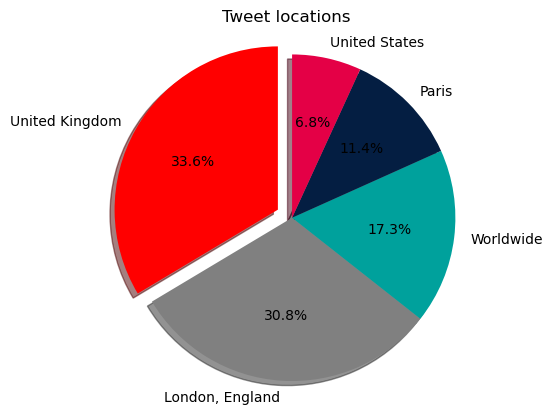

In [12]:
#Creamos un 'pie chart' para representar los lugares desde donde se envian mas tuits
labels = 'United Kingdom', 'London, England', 'Worldwide', 'Paris', 'United States'
sizes = [21600, 19811, 11151, 7354, 4405]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice
colors= ["#FF0000","#808080","#00A19C","#041E42","#E40046"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tweet locations')
plt.show()

In [13]:
#Verificamos valores de 'user_verified' para evitar redundancia en 'pie chart'
f1['user_verified'].value_counts()

False                                                                                                                                                                                       290774
False                                                                                                                                                                                       130747
True                                                                                                                                                                                         15649
True                                                                                                                                                                                          6403
Its race week again #F1                                                                                                                                                                          1
Mexico City Grand Prix 20

In [14]:
#Reemplazamos valores redundantes
f1['user_verified']=(
    f1['user_verified'].replace('False',False).replace('True',True).replace('Its race week again #F1',False)
    .replace('Precisely! #F1 https://t.co/HzNAMRzrnF',False)
    .replace('Mexico City Grand Prix 2021 - F1 Race\r#MexicoGP 🇲🇽 #F1 \n🔴Go Live➡️https://t.co/6dTT0tNIwo\r\n🔴Go Live➡️https://t.co/6dTT0tNIwo\r\n\nSignup and watch unlimited https://t.co/OZO0Xuakz7',False)
    .replace('Well done @alo_oficial 💙 #F1 #QatarGP',False))

In [15]:
#Corroboramos valores de 'True' y 'False'
f1['user_verified'].value_counts()

False    421525
True      22052
Name: user_verified, dtype: int64

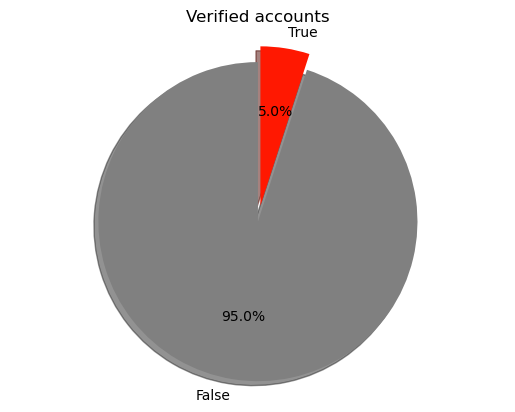

In [16]:
#Creamos un 'pie chart' para representar los porcentajes de cuentas verificadas y no verificadas
labels = 'False', 'True'
sizes = [421506, 22052]
explode = (0, 0.1)  # only "explode" the 2nd slice
colors=["#808080","#FF1801"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Verified accounts')
plt.show()

In [32]:
#Verificamos valores de 'source' para evitar redundancia en grafica de barras
f1['source'].value_counts()

Twitter for iPhone                  158896
Twitter for Android                 113396
Twitter Web App                      88983
TweetDeck                            21715
IFTTT                                16517
                                     ...  
PLANOLY                                  1
Racing Snail Post Service                1
Social-Pull-Staging                      1
Janetter Pro for Android                 1
My sample Twitter app for Python         1
Name: source, Length: 372, dtype: int64

In [88]:
#Reordenamos el index en 'f1'
f1=f1.reset_index(drop=True)
f1

,user_location,user_followers,user_verified,date,text,hashtags,source
0,The Burbs,231.0,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android
1,MNL,833.0,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone
2,Canada,58.0,False,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...,"['F1', 'HungaryGP', 'BREAKINGNEWS', 'FIA']",Twitter for iPhone
3,"South Georgia, USA",1416.0,False,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se...","['LGBT', 'HungarianGP', 'F1']",Twitter for iPhone
4,United Kingdom,3860.0,False,2021-08-01 23:54:08,#NowPlaying on https://t.co/5L1U2uVCQV Downfor...,"['NowPlaying', 'radio', 'motorsport', 'f1', 'b...",Radio King LiveTweet
...,...,...,...,...,...,...,...
443572,"Morpeth, England",580.0,False,2022-08-20 22:28:56,@ecosse_calum Definetly!! Been good through th...,['F1'],Twitter for Android
443573,United Kingdom,2183.0,False,2022-08-20 22:18:15,"This ain't no #F1 ""feeder series"", this is #In...","['F1', 'Indycar', 'SkyIndycar']",Twitter for Android
443574,somewhere gay,185.0,False,2022-08-20 22:18:08,"""I like it. Its a very relaxed, more of a fami...","['f1', 'NASCAR']",Twitter for Android
443575,"Austin, TX",3879.0,False,2022-08-20 22:11:04,@AlaricAloor @fogle_shane @psb_dc @DrJDrooghaa...,"['F2', 'F1', 'IndyCar']",TweetDeck


In [90]:
#Creamos base de datos limpia
f1.to_csv('F1_tweetscleaned.csv')

In [33]:
#Creamos lista de valores de 'source' que queremos graficar
source_names=['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App', 'TweetDeck', 'IFTTT']
f1s= f1[f1.source.isin(source_names)]
f1s

,user_location,user_followers,user_verified,date,text,hashtags,source
2,The Burbs,231.0,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android
4,MNL,833.0,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone
7,Canada,58.0,False,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...,"['F1', 'HungaryGP', 'BREAKINGNEWS', 'FIA']",Twitter for iPhone
8,"South Georgia, USA",1416.0,False,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se...","['LGBT', 'HungarianGP', 'F1']",Twitter for iPhone
10,"Pittsburgh, PA",287.0,False,2021-08-01 23:52:55,I know I’m late to the game but Alonso gained ...,['f1'],Twitter for iPhone
...,...,...,...,...,...,...,...
632381,"Morpeth, England",580.0,False,2022-08-20 22:28:56,@ecosse_calum Definetly!! Been good through th...,['F1'],Twitter for Android
632382,United Kingdom,2183.0,False,2022-08-20 22:18:15,"This ain't no #F1 ""feeder series"", this is #In...","['F1', 'Indycar', 'SkyIndycar']",Twitter for Android
632383,somewhere gay,185.0,False,2022-08-20 22:18:08,"""I like it. Its a very relaxed, more of a fami...","['f1', 'NASCAR']",Twitter for Android
632386,"Austin, TX",3879.0,False,2022-08-20 22:11:04,@AlaricAloor @fogle_shane @psb_dc @DrJDrooghaa...,"['F2', 'F1', 'IndyCar']",TweetDeck


In [34]:
#Listas a graficar
source_names=['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App', 'TweetDeck', 'IFTTT']
source_values=[158896, 113396, 88983, 21715, 16517]

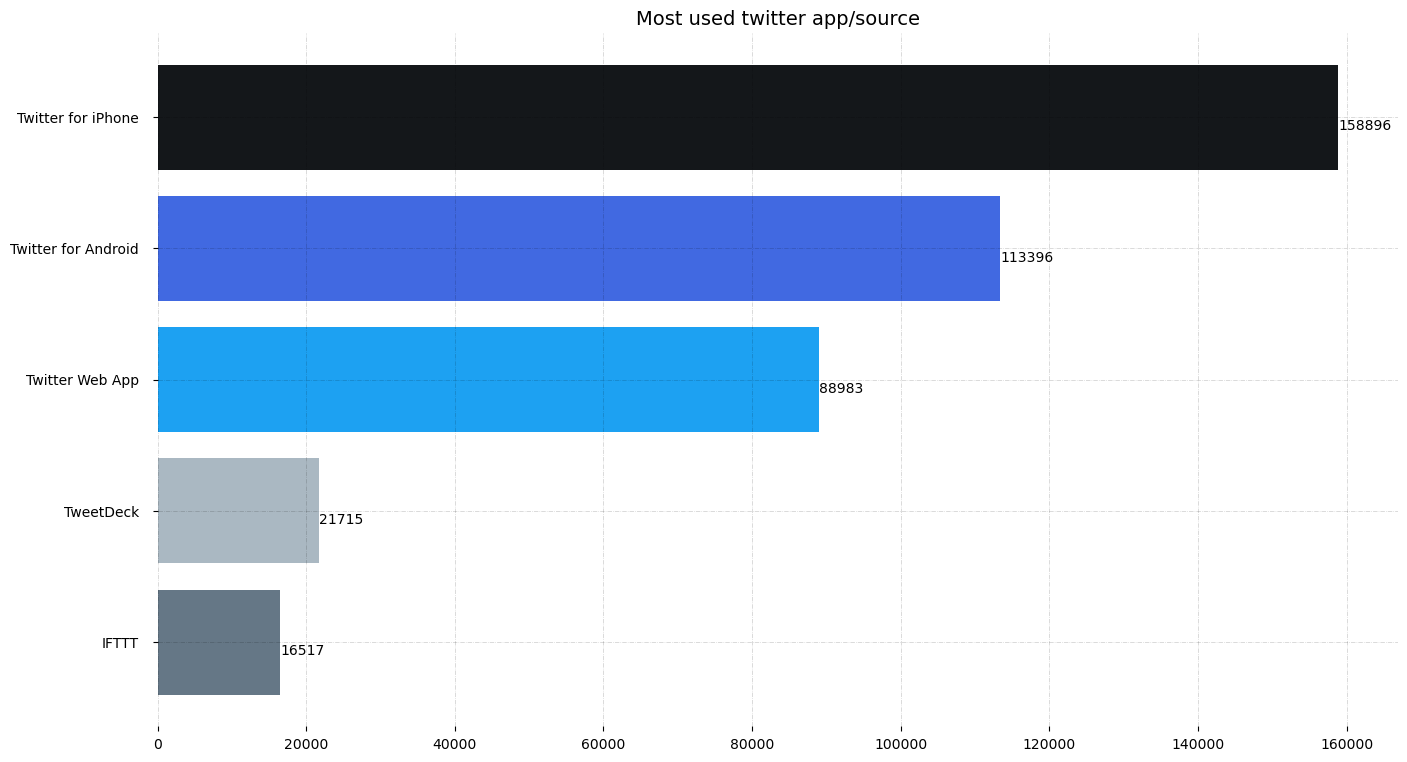

In [35]:
#Grafica de barras horizontal
fig, ax = plt.subplots(figsize =(16, 9))
colors = ['#14171A','royalblue','#1DA1F2','#AAB8C2','#657786']

#Horizontal Bar Plot
ax.barh(source_names, source_values, color=colors)

#Remover los bordes de la grafica
for s in ['top','bottom','left','right']:
	ax.spines[s].set_visible(False)

#Separacion de valores y barras en x y y
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#Agregar grid en x y y para mejor visualizacion
ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

#Orden descendente
ax.invert_yaxis()

#Valor de cada barra
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=10, color='black')

ax.set_title('Most used twitter app/source', fontsize=14)
plt.show()

### SENTIMENT ANALYSIS

In [18]:
#Importamos librerias de 'Natural Language ToolKit', NLTK, metodo VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
f1sia=f1['date'],f1['text']
f1sia=pd.DataFrame(f1sia)
f1sia=f1sia.set_axis(['date', 'text'], axis=0)
f1sia

,2,4,7,8,9,10,12,14,15,17,...,632374,632375,632377,632379,632380,632381,632382,632383,632386,632387
date,2021-08-01 23:58:48,2021-08-01 23:57:40,2021-08-01 23:55:18,2021-08-01 23:54:25,2021-08-01 23:54:08,2021-08-01 23:52:55,2021-08-01 23:52:35,2021-08-01 23:51:56,2021-08-01 23:51:45,2021-08-01 23:51:02,...,2022-08-20 22:46:07,2022-08-20 22:45:25,2022-08-20 22:35:06,2022-08-20 22:34:03,2022-08-20 22:30:00,2022-08-20 22:28:56,2022-08-20 22:18:15,2022-08-20 22:18:08,2022-08-20 22:11:04,2022-08-20 22:10:27
text,This has been a tiring #f1 day... https://t.co...,No words to describe the #HungarianGP so I wil...,Breaking news FIA has disqualified @OconEsteb...,"VIDEO—""They can disqualify me if they want""-Se...",#NowPlaying on https://t.co/5L1U2uVCQV Downfor...,I know I’m late to the game but Alonso gained ...,vettle is some lad for getting disqualified\n\...,Gutted #Vettel #f1 https://t.co/cCiG2Y8BDn,Ocon wins #HungaryGP! #Race #f1 https://t.co/g...,What day at the #Hungaroring as F1 put on an a...,...,Get your Official Red Bull teamwear and access...,Given the average person's head has a mass of ...,Downforce Radio - Episode 5: NASCAR\n#NowPlayi...,Is Automobilista 2 a BETTER F1 Game? https://t...,Catch up with the best news of the day! #F1 \n...,@ecosse_calum Definetly!! Been good through th...,"This ain't no #F1 ""feeder series"", this is #In...","""I like it. Its a very relaxed, more of a fami...",@AlaricAloor @fogle_shane @psb_dc @DrJDrooghaa...,Find it harder and harder to stay up late for ...


In [20]:
f1sia=f1sia.transpose()
f1sia=f1sia.reset_index(drop=True)
f1sia

,date,text
0,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...
1,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...
2,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...
3,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se..."
4,2021-08-01 23:54:08,#NowPlaying on https://t.co/5L1U2uVCQV Downfor...
...,...,...
443572,2022-08-20 22:28:56,@ecosse_calum Definetly!! Been good through th...
443573,2022-08-20 22:18:15,"This ain't no #F1 ""feeder series"", this is #In..."
443574,2022-08-20 22:18:08,"""I like it. Its a very relaxed, more of a fami..."
443575,2022-08-20 22:11:04,@AlaricAloor @fogle_shane @psb_dc @DrJDrooghaa...


In [21]:
#Llamamos al 'SentimentIntensityAnalyzer'
sia = SentimentIntensityAnalyzer()

In [23]:
f1sia['sentiment_score'] = f1sia['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(f1sia.head(20))

                   date                                               text  \
0   2021-08-01 23:58:48  This has been a tiring #f1 day... https://t.co...   
1   2021-08-01 23:57:40  No words to describe the #HungarianGP so I wil...   
2   2021-08-01 23:55:18  Breaking news FIA has disqualified  @OconEsteb...   
3   2021-08-01 23:54:25  VIDEO—"They can disqualify me if they want"-Se...   
4   2021-08-01 23:54:08  #NowPlaying on https://t.co/5L1U2uVCQV Downfor...   
5   2021-08-01 23:52:55  I know I’m late to the game but Alonso gained ...   
6   2021-08-01 23:52:35  vettle is some lad for getting disqualified\n\...   
7   2021-08-01 23:51:56         Gutted #Vettel #f1 https://t.co/cCiG2Y8BDn   
8   2021-08-01 23:51:45  Ocon wins #HungaryGP! #Race #f1 https://t.co/g...   
9   2021-08-01 23:51:02  What day at the #Hungaroring as F1 put on an a...   
10  2021-08-01 23:49:47  Which first-time #F1 race win was the most sat...   
11  2021-08-01 23:49:17  "He got what he deserved. Tifosi traito

In [24]:
#Validamos el 'score' de un tuit x
print(f1sia['text'].iloc[1])
print(f1sia['sentiment_score'].iloc[1])

No words to describe the #HungarianGP so I will just say it was a fantastic shit race

Vettel deserved P2
Ham shunning all the haters w/ the 6pt lead
ALO-HAM battle on repeat
Congrats Ocon
I am still grieving for Lando’s broken streak

#F1
-0.875


In [95]:
#Probamos con cualquier texto no incluido en la bd
sentiment = SentimentIntensityAnalyzer()
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 = "I hate mondays"
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}


In [25]:
#Valores de referencia:
    #Score >=0.5 ~ Positivo
    #Score -0.5-0.5 ~ Neutral
    #Score <-0.5 ~ Negativo

def categorize_sentiment(score):
    if score >= 0.5:
        return 'positive'
    elif score > -0.5 and score < 0.5:
        return 'neutral'
    else:
        return 'negative'

f1sia['sentiment_category'] = f1sia['sentiment_score'].apply(categorize_sentiment)
f1sia.head(20)

,date,text,sentiment_score,sentiment_category
0,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,0.0000,neutral
1,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,-0.8750,negative
2,2021-08-01 23:55:18,Breaking news FIA has disqualified @OconEsteb...,0.2500,neutral
3,2021-08-01 23:54:25,"VIDEO—""They can disqualify me if they want""-Se...",0.6369,positive
4,2021-08-01 23:54:08,#NowPlaying on https://t.co/5L1U2uVCQV Downfor...,0.4559,neutral
5,2021-08-01 23:52:55,I know I’m late to the game but Alonso gained ...,0.6925,positive
6,2021-08-01 23:52:35,vettle is some lad for getting disqualified\n\...,-0.4215,neutral
7,2021-08-01 23:51:56,Gutted #Vettel #f1 https://t.co/cCiG2Y8BDn,0.0000,neutral
8,2021-08-01 23:51:45,Ocon wins #HungaryGP! #Race #f1 https://t.co/g...,0.6114,positive
9,2021-08-01 23:51:02,What day at the #Hungaroring as F1 put on an a...,0.1007,neutral


In [26]:
#Pasamos columna 'text' a minusculas
f1sia['text']=f1sia['text'].str.lower()

In [27]:
f1sia['sentiment_category'].value_counts()

neutral     290569
positive    115493
negative     37515
Name: sentiment_category, dtype: int64

In [36]:
#Listas a graficar
sentiment_category=['Positive', 'Neutral', 'Negative']
sentiment_count=[115493, 290569, 37515]

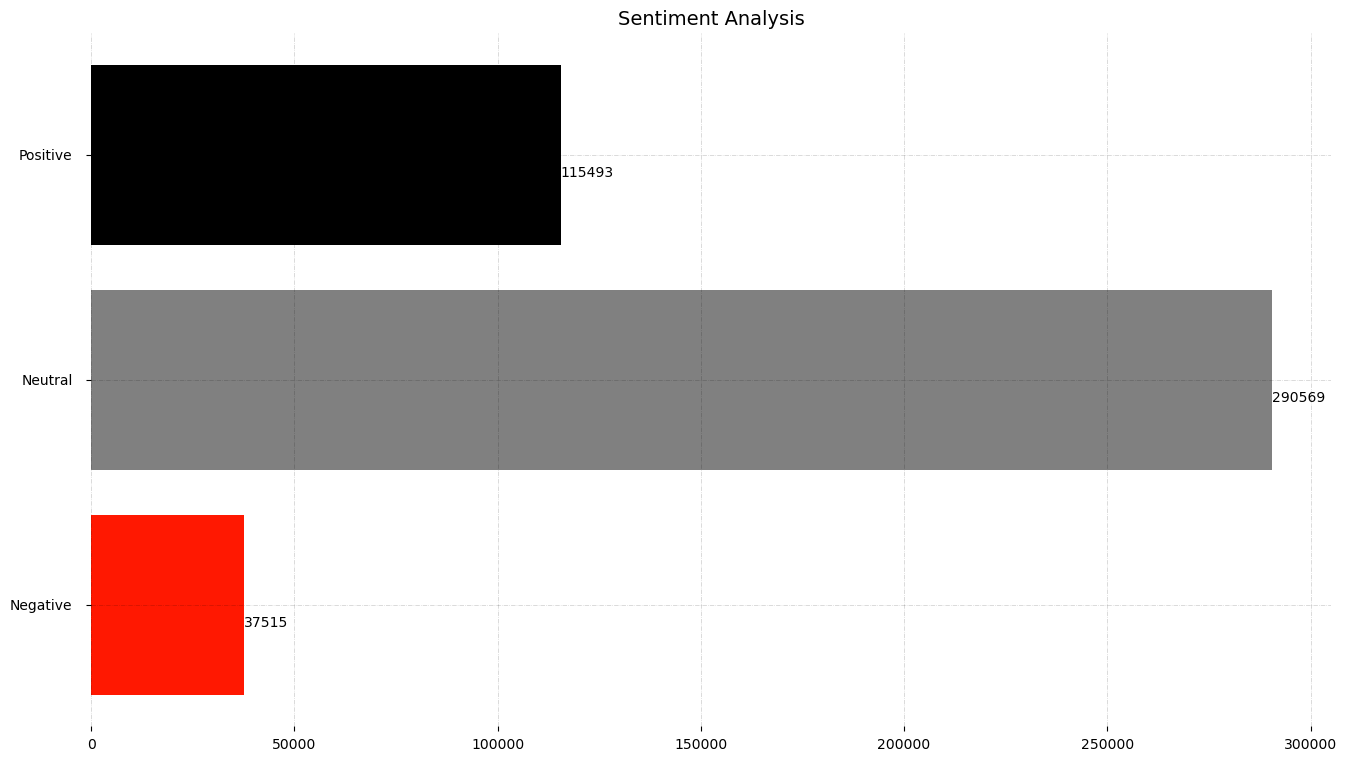

In [37]:
#Grafica de barras horizontal
fig, ax = plt.subplots(figsize =(16, 9))
colors = ['#000000','#808080','#FF1801']

#Horizontal Bar Plot
ax.barh(sentiment_category, sentiment_count, color=colors)

#Remover los bordes de la grafica
for s in ['top','bottom','left','right']:
	ax.spines[s].set_visible(False)

#Separacion de valores y barras en x y y
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#Agregar grid en x y y para mejor visualizacion
ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

#Orden descendente
ax.invert_yaxis()

#Valor de cada barra
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=10, color='black')

ax.set_title('Sentiment Analysis', fontsize=14)
plt.show()

In [38]:
#Eliminamos caracteres especiales de 'text'
f1sia['text']= f1sia['text'].str.replace('\W', ' ', regex=True)
f1sia

,date,text,sentiment_score,sentiment_category
0,2021-08-01 23:58:48,this has been a tiring f1 day https t co...,0.0000,neutral
1,2021-08-01 23:57:40,no words to describe the hungariangp so i wil...,-0.8750,negative
2,2021-08-01 23:55:18,breaking news fia has disqualified oconesteb...,0.2500,neutral
3,2021-08-01 23:54:25,video they can disqualify me if they want se...,0.6369,positive
4,2021-08-01 23:54:08,nowplaying on https t co 5l1u2uvcqv downfor...,0.4559,neutral
...,...,...,...,...
443572,2022-08-20 22:28:56,ecosse_calum definetly been good through th...,0.5399,positive
443573,2022-08-20 22:18:15,this ain t no f1 feeder series this is in...,0.8050,positive
443574,2022-08-20 22:18:08,i like it its a very relaxed more of a fami...,0.7178,positive
443575,2022-08-20 22:11:04,alaricaloor fogle_shane psb_dc drjdrooghaa...,0.4215,neutral


In [39]:
#Contamos las menciones de los pilotos en nuestra bd
yk=f1sia['text'].str.contains('yuki').sum()+f1sia['text'].str.contains('tsunoda').sum()
print('Yuki Tsunoda mentions:',yk)
ln=f1sia['text'].str.contains('lando').sum()+f1sia['text'].str.contains('norris').sum()
print('Lando Norris mentions:',ln)
zg=f1sia['text'].str.contains('zhou').sum()+f1sia['text'].str.contains('guanyu').sum()
print('Zhou Guanyu mentions:',zg)
ls=f1sia['text'].str.contains('lance').sum()+f1sia['text'].str.contains('stroll').sum()
print('Lance Stroll mentions:',ls)
gr=f1sia['text'].str.contains('george').sum()+f1sia['text'].str.contains('russell').sum()
print('George Russell mentions:',gr)
cl=f1sia['text'].str.contains('charles').sum()+f1sia['text'].str.contains('leclerc').sum()
print('Charles Leclerc mentions:',cl)
mv=f1sia['text'].str.contains('max').sum()+f1sia['text'].str.contains('verstappen').sum()
print('Max Verstappen mentions:',mv)
eo=f1sia['text'].str.contains('esteban').sum()+f1sia['text'].str.contains('ocon').sum()
print('Esteban Ocon mentions:',eo)
aa=f1sia['text'].str.contains('alex').sum()+f1sia['text'].str.contains('albon').sum()
print('Alex Albon mentions:',aa)
pg=f1sia['text'].str.contains('pierre').sum()+f1sia['text'].str.contains('gasly').sum()
print('Pierre Gasly mentions:',pg)
nl=f1sia['text'].str.contains('nicholas').sum()+f1sia['text'].str.contains('latifi').sum()
print('Nicholas Latifi mentions:',nl)
cs=f1sia['text'].str.contains('carlos').sum()+f1sia['text'].str.contains('sainz').sum()
print('Carlos Sainz mentions:',cs)
km=f1sia['text'].str.contains('kevin').sum()+f1sia['text'].str.contains('magnussen').sum()
print('Kevin Magnussen mentions:',km)
vb=f1sia['text'].str.contains('valtteri').sum()+f1sia['text'].str.contains('bottas').sum()
print('Valtteri Bottas mentions:',vb)
dr=f1sia['text'].str.contains('daniel').sum()+f1sia['text'].str.contains('ricciardo').sum()
print('Daniel Ricciardo mentions:',dr)
sp=f1sia['text'].str.contains('sergio').sum()+f1sia['text'].str.contains('perez').sum()+f1sia['text'].str.contains('checo').sum()
print('Sergio Perez mentions:',sp)
sv=f1sia['text'].str.contains('sebastian').sum()+f1sia['text'].str.contains('vettel').sum()
print('Sebastian Vettel mentions:',sv)
lh=f1sia['text'].str.contains('lewis').sum()+f1sia['text'].str.contains('hamilton').sum()
print('Lewis Hamilton mentions:',lh)
fa=f1sia['text'].str.contains('fernando').sum()+f1sia['text'].str.contains('alonso').sum()
print('Fernando Alonso mentions:',fa)
ms=f1sia['text'].str.contains('mick').sum()+f1sia['text'].str.contains('schumacher').sum()
print('Mick Schumacher mentions:',ms)

Yuki Tsunoda mentions: 4242
Lando Norris mentions: 13038
Zhou Guanyu mentions: 3706
Lance Stroll mentions: 4048
George Russell mentions: 13297
Charles Leclerc mentions: 15747
Max Verstappen mentions: 114447
Esteban Ocon mentions: 9433
Alex Albon mentions: 4191
Pierre Gasly mentions: 6787
Nicholas Latifi mentions: 5060
Carlos Sainz mentions: 16174
Kevin Magnussen mentions: 2073
Valtteri Bottas mentions: 22319
Daniel Ricciardo mentions: 8295
Sergio Perez mentions: 20724
Sebastian Vettel mentions: 9100
Lewis Hamilton mentions: 123136
Fernando Alonso mentions: 11092
Mick Schumacher mentions: 8295


In [40]:
#Listas a graficar
drivers=['Lewis Hamilton','Max Verstappen','Valtteri Bottas','Sergio Perez','Carlos Sainz','Charles Leclerc','George Russell',
        'Lando Norris','Fernando Alonso','Esteban Ocon','Sebastian Vettel','Daniel Ricciardo','Mick Schumacher','Pierre Gasly',
        'Nicholas Latifi','Yuki Tsunoda','Alex Albon','Lance Stroll','Zhou Guanyu','Kevin Magnussen']
mentions=[4242,13038,3706,4048,13297,15747,114447,9433,4191,6787,5060,16174,2073,22319,8295,20724,9100,123136,11092,8295]

In [41]:
#Mentions se ordena de forma descendente
mentions.sort(reverse=True)

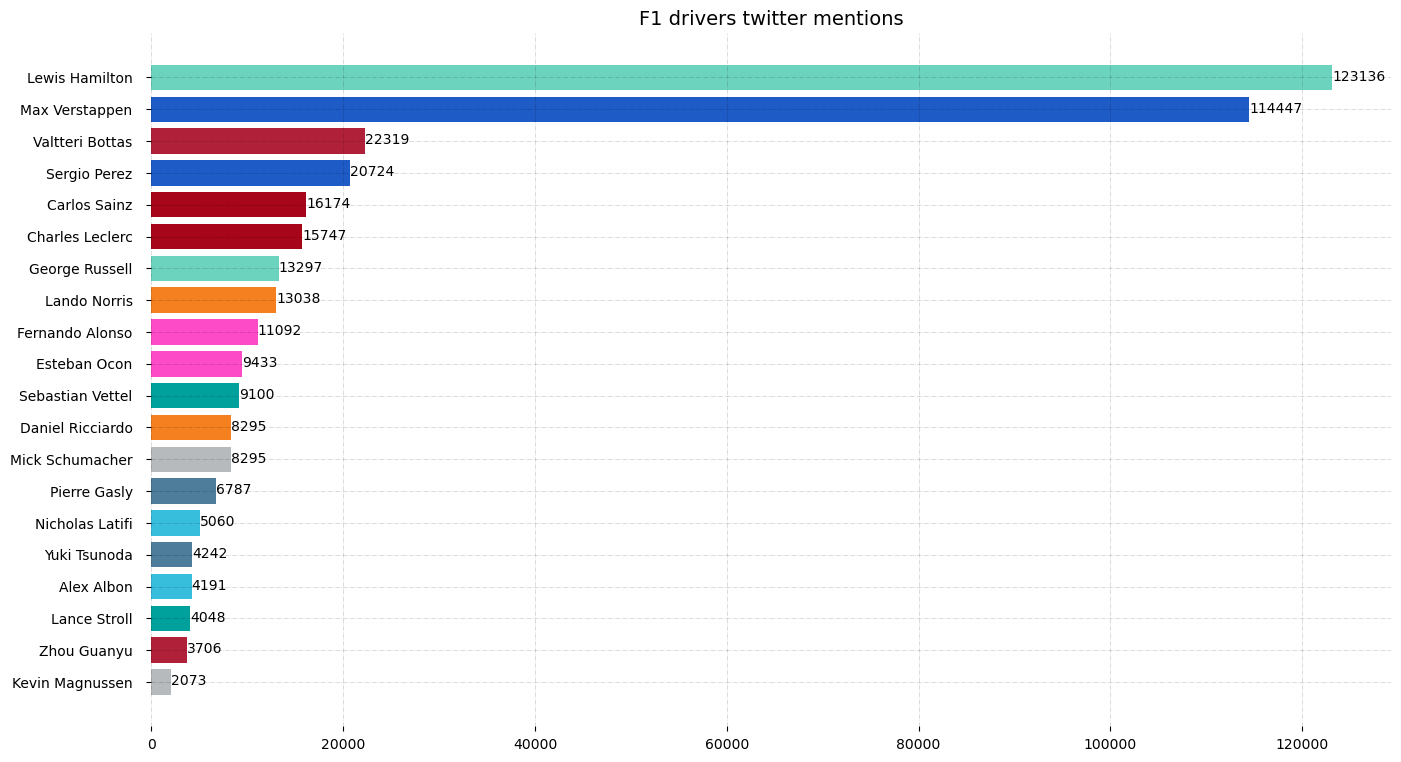

In [42]:
#Grafica de barras horizontal
fig, ax = plt.subplots(figsize =(16, 9))
colors = ['#6CD3BF','#1E5BC6','#B12039','#1E5BC6','#A6051A','#A6051A','#6CD3BF','#F58020','#FD4BC7','#FD4BC7',
         '#00A19C','#F58020','#B6BABD','#4E7C9B','#37BEDD','#4E7C9B','#37BEDD','#00A19C',
         '#B12039','#B6BABD']

#Horizontal Bar Plot
ax.barh(drivers, mentions, color=colors)

#Remover los bordes de la grafica
for s in ['top','bottom','left','right']:
	ax.spines[s].set_visible(False)

#Separacion de valores y barras en x y y
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#Agregar grid en x y y para mejor visualizacion
ax.grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

#Orden descendente
ax.invert_yaxis()

#Valor de cada barra
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=10, color='black')

ax.set_title('F1 drivers twitter mentions', fontsize=14)
plt.show()

In [28]:
#Creamos db de 'user_verified' y 'sentiment_category'
uv=pd.DataFrame(f1['user_verified'])
uv=uv.reset_index(drop=True)
print(uv)
sc=pd.DataFrame(f1sia['sentiment_category'])
print(sc)

        user_verified
0               False
1               False
2               False
3               False
4               False
...               ...
443572          False
443573          False
443574          False
443575          False
443576          False

[443577 rows x 1 columns]
       sentiment_category
0                 neutral
1                negative
2                 neutral
3                positive
4                 neutral
...                   ...
443572           positive
443573           positive
443574           positive
443575            neutral
443576            neutral

[443577 rows x 1 columns]


In [29]:
#Creamos la tabla para graficar el 'sentimiento' de las cuentas verificadas, 
#las cuales tienes mayor 'peso' en la opinion publica
vs=np.concatenate((uv,sc),axis=1)
vs=pd.DataFrame(vs)
vs=vs.set_axis(['user_verified','sentiment_category'],axis=1)
vs

,user_verified,sentiment_category
0,False,neutral
1,False,negative
2,False,neutral
3,False,positive
4,False,neutral
...,...,...
443572,False,positive
443573,False,positive
443574,False,positive
443575,False,neutral


In [30]:
#Creamos db
vs_true=vs[(vs['user_verified']==True)]
vs_true

,user_verified,sentiment_category
42,True,neutral
44,True,negative
80,True,negative
146,True,positive
188,True,neutral
...,...,...
443505,True,neutral
443512,True,neutral
443519,True,negative
443538,True,neutral


Text(0.5, 1.0, 'Sentiments on verified accounts')

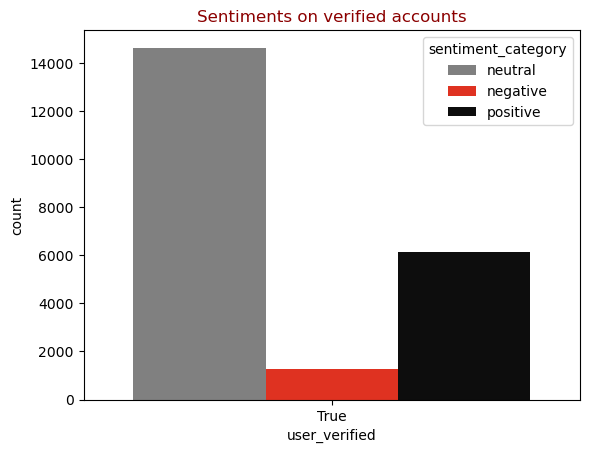

In [31]:
sns.countplot(data=vs_true, x="user_verified", hue="sentiment_category", palette=["#808080","#FF1801","#0d0d0d"])
plt.title('Sentiments on verified accounts', color='darkred')

### Modelo Naive Bayes

In [43]:
#Importamos las bibliotecas necesarias para probar el modelo de Sentiment Analysis Multinomial Naive Bayes MNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
#Elimamos las 'stop words'
stop_words = stopwords.words('english')
sw_list=['"','@','#','!', 'https://','-',"'"]
stop_words.extend(sw_list)
f1sia['text'] = f1sia['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#Lematizamos las palabras esenciales
lemmatizer = WordNetLemmatizer()
f1sia['text'] = f1sia['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

#Vectorizamos el texto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(f1sia['text'])
y = f1sia['sentiment_category']

In [45]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#Entrenamos el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

#Hacemos predicciones en la data de prueba
y_pred = model.predict(X_test)

#Probamos la certeza del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7863744983993868
